# Import bibliotek

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
import pandas as pd

import torch
from torch import nn
from torchvision import transforms

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tqdm.auto import tqdm
from timeit import default_timer as timer 

from typing import List, Dict

In [20]:
import sys
sys.path.append("../src/")

from data_setup import create_dataloaders
from model_builder import HybridModel
from engine import train_step, test_step, train

# Wczytanie danych

In [6]:
df = pd.read_csv("../data/datasets_sum.csv")
df

,Emotion,Path,Dataset,Emotion_mapped
0,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Crema,0
1,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Crema,0
2,NEUTRAL,../data/kaggle/input/speech-emotion-recognitio...,Crema,1
3,NEUTRAL,../data/kaggle/input/speech-emotion-recognitio...,Crema,1
4,DISGUST,../data/kaggle/input/speech-emotion-recognitio...,Crema,2
...,...,...,...,...
9390,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess,0
9391,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess,0
9392,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess,0
9393,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess,0


In [7]:
df = df[df["Dataset"]=="Ravdess"].reset_index(drop=True)

In [8]:
SAMPLE_RATE = 44100
SEED = 42

In [9]:
train_df, test_df = train_test_split(df, test_size=0.3, stratify=df["Emotion_mapped"], random_state=SEED)

In [10]:
original_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485], std=[0.229])
])

augment_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485], std=[0.229])
])

In [11]:
train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dataframe=train_df, 
    test_dataframe=test_df, 
    original_transform=original_transform, 
    augment_transform=augment_transform,
    batch_size=32
)

In [12]:
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x127af67e0>,
 array(['FEAR', 'ANGRY', 'HAPPY', 'NEUTRAL', 'DISGUST'], dtype=object))

# Model

## Uczenie

In [18]:
from data_setup import create_dataloaders
from engine import train_step, test_step, train

device = torch.device("mps") if torch.backends.mps.is_available() else "cpu"

torch.manual_seed(SEED) 
torch.mps.manual_seed(SEED)

NUM_EPOCHS = 100

model = HybridModel(num_emotions=len(class_names)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

start_time = timer()

model_results = train(model=model, 
                      train_dataloader=train_dataloader,
                      test_dataloader=test_dataloader,
                      optimizer=optimizer,
                      loss_fn=loss_fn, 
                      epochs=NUM_EPOCHS,
                      device=device)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  1%|          | 1/100 [01:55<3:10:08, 115.23s/it]

Epoch: 1 | train_loss: 1.6005 | train_acc: 0.2160 | test_loss: 1.6316 | test_acc: 0.2014


  2%|▏         | 2/100 [03:45<3:02:59, 112.03s/it]

Epoch: 2 | train_loss: 1.5916 | train_acc: 0.2182 | test_loss: 1.6369 | test_acc: 0.2014


  3%|▎         | 3/100 [05:33<2:58:31, 110.43s/it]

Epoch: 3 | train_loss: 1.5871 | train_acc: 0.2281 | test_loss: 1.6443 | test_acc: 0.2014


  4%|▍         | 4/100 [07:21<2:55:14, 109.53s/it]

Epoch: 4 | train_loss: 1.5781 | train_acc: 0.2242 | test_loss: 1.6279 | test_acc: 0.2014


  5%|▌         | 5/100 [09:09<2:52:33, 108.98s/it]

Epoch: 5 | train_loss: 1.5626 | train_acc: 0.2717 | test_loss: 1.6461 | test_acc: 0.2014


  6%|▌         | 6/100 [10:57<2:50:13, 108.65s/it]

Epoch: 6 | train_loss: 1.5493 | train_acc: 0.2881 | test_loss: 1.6248 | test_acc: 0.2014


  7%|▋         | 7/100 [12:49<2:49:45, 109.52s/it]

Epoch: 7 | train_loss: 1.5235 | train_acc: 0.2991 | test_loss: 1.6259 | test_acc: 0.2014


  8%|▊         | 8/100 [14:40<2:48:59, 110.21s/it]

Epoch: 8 | train_loss: 1.5004 | train_acc: 0.3311 | test_loss: 1.6477 | test_acc: 0.2014


  9%|▉         | 9/100 [16:31<2:47:27, 110.42s/it]

Epoch: 9 | train_loss: 1.4528 | train_acc: 0.3531 | test_loss: 1.6631 | test_acc: 0.2014


 10%|█         | 10/100 [18:24<2:46:39, 111.10s/it]

Epoch: 10 | train_loss: 1.4183 | train_acc: 0.3753 | test_loss: 1.6820 | test_acc: 0.2257


 11%|█         | 11/100 [20:14<2:44:33, 110.94s/it]

Epoch: 11 | train_loss: 1.3608 | train_acc: 0.4120 | test_loss: 1.7014 | test_acc: 0.3090


 12%|█▏        | 12/100 [22:03<2:41:39, 110.22s/it]

Epoch: 12 | train_loss: 1.3698 | train_acc: 0.4208 | test_loss: 1.7394 | test_acc: 0.3194


 13%|█▎        | 13/100 [23:54<2:40:05, 110.41s/it]

Epoch: 13 | train_loss: 1.3416 | train_acc: 0.4375 | test_loss: 1.8211 | test_acc: 0.2917


 14%|█▍        | 14/100 [25:44<2:38:11, 110.36s/it]

Epoch: 14 | train_loss: 1.2981 | train_acc: 0.4537 | test_loss: 1.8586 | test_acc: 0.2500


 15%|█▌        | 15/100 [27:34<2:36:20, 110.36s/it]

Epoch: 15 | train_loss: 1.2906 | train_acc: 0.4682 | test_loss: 1.8711 | test_acc: 0.2639


 16%|█▌        | 16/100 [29:30<2:36:37, 111.88s/it]

Epoch: 16 | train_loss: 1.2516 | train_acc: 0.4907 | test_loss: 1.9477 | test_acc: 0.2222


 17%|█▋        | 17/100 [31:21<2:34:39, 111.80s/it]

Epoch: 17 | train_loss: 1.2483 | train_acc: 0.4704 | test_loss: 2.1331 | test_acc: 0.1979


 18%|█▊        | 18/100 [33:21<2:36:05, 114.22s/it]

Epoch: 18 | train_loss: 1.2338 | train_acc: 0.4846 | test_loss: 2.0616 | test_acc: 0.1944


 19%|█▉        | 19/100 [35:14<2:33:33, 113.75s/it]

Epoch: 19 | train_loss: 1.1611 | train_acc: 0.5178 | test_loss: 2.1118 | test_acc: 0.2083


 20%|██        | 20/100 [37:11<2:32:55, 114.69s/it]

Epoch: 20 | train_loss: 1.2115 | train_acc: 0.5000 | test_loss: 2.3499 | test_acc: 0.2049


 21%|██        | 21/100 [39:04<2:30:30, 114.31s/it]

Epoch: 21 | train_loss: 1.1677 | train_acc: 0.5063 | test_loss: 2.0334 | test_acc: 0.2118


 22%|██▏       | 22/100 [41:05<2:31:09, 116.27s/it]

Epoch: 22 | train_loss: 1.1807 | train_acc: 0.5244 | test_loss: 2.1079 | test_acc: 0.1875


 23%|██▎       | 23/100 [43:00<2:28:44, 115.90s/it]

Epoch: 23 | train_loss: 1.1429 | train_acc: 0.5307 | test_loss: 2.0218 | test_acc: 0.2188


 24%|██▍       | 24/100 [44:51<2:24:52, 114.37s/it]

Epoch: 24 | train_loss: 1.1160 | train_acc: 0.5439 | test_loss: 2.2051 | test_acc: 0.2014


 25%|██▌       | 25/100 [46:50<2:24:56, 115.96s/it]

Epoch: 25 | train_loss: 1.1116 | train_acc: 0.5436 | test_loss: 2.0750 | test_acc: 0.2014


 26%|██▌       | 26/100 [48:41<2:21:11, 114.47s/it]

Epoch: 26 | train_loss: 1.1231 | train_acc: 0.5526 | test_loss: 2.2262 | test_acc: 0.1979


 27%|██▋       | 27/100 [50:37<2:19:42, 114.83s/it]

Epoch: 27 | train_loss: 1.1144 | train_acc: 0.5411 | test_loss: 2.0004 | test_acc: 0.2222


 28%|██▊       | 28/100 [52:30<2:17:11, 114.33s/it]

Epoch: 28 | train_loss: 1.0917 | train_acc: 0.5493 | test_loss: 2.2035 | test_acc: 0.1979


 29%|██▉       | 29/100 [54:28<2:16:23, 115.26s/it]

Epoch: 29 | train_loss: 1.0797 | train_acc: 0.5578 | test_loss: 2.4838 | test_acc: 0.1944


 30%|███       | 30/100 [56:24<2:14:52, 115.61s/it]

Epoch: 30 | train_loss: 1.0849 | train_acc: 0.5658 | test_loss: 2.1414 | test_acc: 0.1736


 31%|███       | 31/100 [58:18<2:12:12, 114.96s/it]

Epoch: 31 | train_loss: 1.0665 | train_acc: 0.5707 | test_loss: 2.3245 | test_acc: 0.2153


 32%|███▏      | 32/100 [1:00:19<2:12:28, 116.90s/it]

Epoch: 32 | train_loss: 1.0410 | train_acc: 0.5789 | test_loss: 2.3106 | test_acc: 0.2118


 33%|███▎      | 33/100 [1:02:12<2:09:18, 115.80s/it]

Epoch: 33 | train_loss: 1.0406 | train_acc: 0.5806 | test_loss: 2.3703 | test_acc: 0.2049


 34%|███▍      | 34/100 [1:04:11<2:08:21, 116.69s/it]

Epoch: 34 | train_loss: 1.0814 | train_acc: 0.5496 | test_loss: 1.9629 | test_acc: 0.2153


 35%|███▌      | 35/100 [1:06:05<2:05:26, 115.79s/it]

Epoch: 35 | train_loss: 1.0301 | train_acc: 0.5888 | test_loss: 2.3498 | test_acc: 0.2153


 36%|███▌      | 36/100 [1:07:59<2:02:53, 115.21s/it]

Epoch: 36 | train_loss: 1.0031 | train_acc: 0.6116 | test_loss: 2.2869 | test_acc: 0.2118


 37%|███▋      | 37/100 [1:09:55<2:01:23, 115.60s/it]

Epoch: 37 | train_loss: 1.0447 | train_acc: 0.5704 | test_loss: 2.1821 | test_acc: 0.2188


 38%|███▊      | 38/100 [1:11:46<1:58:00, 114.20s/it]

Epoch: 38 | train_loss: 0.9929 | train_acc: 0.5943 | test_loss: 2.2831 | test_acc: 0.2014


 39%|███▉      | 39/100 [1:13:48<1:58:31, 116.58s/it]

Epoch: 39 | train_loss: 1.0052 | train_acc: 0.5872 | test_loss: 2.4948 | test_acc: 0.2153


 40%|████      | 40/100 [1:15:44<1:56:13, 116.22s/it]

Epoch: 40 | train_loss: 0.9690 | train_acc: 0.6044 | test_loss: 2.4405 | test_acc: 0.2118


 41%|████      | 41/100 [1:17:36<1:53:12, 115.13s/it]

Epoch: 41 | train_loss: 0.9596 | train_acc: 0.6116 | test_loss: 2.3417 | test_acc: 0.2118


 42%|████▏     | 42/100 [1:19:32<1:51:21, 115.20s/it]

Epoch: 42 | train_loss: 0.9402 | train_acc: 0.6264 | test_loss: 2.4516 | test_acc: 0.2188


 43%|████▎     | 43/100 [1:21:25<1:48:52, 114.60s/it]

Epoch: 43 | train_loss: 0.9736 | train_acc: 0.6091 | test_loss: 2.2186 | test_acc: 0.2083


 44%|████▍     | 44/100 [1:23:22<1:47:48, 115.50s/it]

Epoch: 44 | train_loss: 0.9387 | train_acc: 0.6223 | test_loss: 2.3914 | test_acc: 0.1979


 45%|████▌     | 45/100 [1:25:16<1:45:15, 114.82s/it]

Epoch: 45 | train_loss: 0.9439 | train_acc: 0.6162 | test_loss: 2.4489 | test_acc: 0.2118


 46%|████▌     | 46/100 [1:27:16<1:44:45, 116.41s/it]

Epoch: 46 | train_loss: 0.9251 | train_acc: 0.6324 | test_loss: 2.5234 | test_acc: 0.1944


 47%|████▋     | 47/100 [1:29:10<1:42:17, 115.80s/it]

Epoch: 47 | train_loss: 0.9453 | train_acc: 0.6313 | test_loss: 2.3922 | test_acc: 0.2153


 48%|████▊     | 48/100 [1:30:59<1:38:42, 113.89s/it]

Epoch: 48 | train_loss: 0.9652 | train_acc: 0.6206 | test_loss: 2.3213 | test_acc: 0.1944


 49%|████▉     | 49/100 [1:32:53<1:36:40, 113.73s/it]

Epoch: 49 | train_loss: 0.9096 | train_acc: 0.6261 | test_loss: 2.1046 | test_acc: 0.2569


 50%|█████     | 50/100 [1:34:45<1:34:26, 113.34s/it]

Epoch: 50 | train_loss: 0.9141 | train_acc: 0.6541 | test_loss: 2.3419 | test_acc: 0.2049


 51%|█████     | 51/100 [1:36:41<1:33:11, 114.10s/it]

Epoch: 51 | train_loss: 0.8766 | train_acc: 0.6258 | test_loss: 2.1761 | test_acc: 0.2569


 52%|█████▏    | 52/100 [1:38:30<1:30:00, 112.51s/it]

Epoch: 52 | train_loss: 0.8937 | train_acc: 0.6417 | test_loss: 2.5514 | test_acc: 0.2049


 53%|█████▎    | 53/100 [1:40:29<1:29:45, 114.58s/it]

Epoch: 53 | train_loss: 0.8879 | train_acc: 0.6527 | test_loss: 2.0802 | test_acc: 0.2361


 54%|█████▍    | 54/100 [1:42:24<1:27:50, 114.58s/it]

Epoch: 54 | train_loss: 0.8835 | train_acc: 0.6379 | test_loss: 2.4889 | test_acc: 0.2014


 55%|█████▌    | 55/100 [1:44:13<1:24:41, 112.93s/it]

Epoch: 55 | train_loss: 0.9173 | train_acc: 0.6288 | test_loss: 2.4519 | test_acc: 0.2188


 56%|█████▌    | 56/100 [1:46:13<1:24:20, 115.02s/it]

Epoch: 56 | train_loss: 0.8382 | train_acc: 0.6754 | test_loss: 2.4620 | test_acc: 0.2153


 57%|█████▋    | 57/100 [1:48:08<1:22:31, 115.16s/it]

Epoch: 57 | train_loss: 0.8695 | train_acc: 0.6554 | test_loss: 2.5777 | test_acc: 0.1910


 58%|█████▊    | 58/100 [1:50:12<1:22:21, 117.65s/it]

Epoch: 58 | train_loss: 0.8491 | train_acc: 0.6686 | test_loss: 2.4334 | test_acc: 0.1910


 59%|█████▉    | 59/100 [1:52:04<1:19:10, 115.87s/it]

Epoch: 59 | train_loss: 0.8605 | train_acc: 0.6702 | test_loss: 2.6124 | test_acc: 0.1910


 60%|██████    | 60/100 [1:54:06<1:18:34, 117.87s/it]

Epoch: 60 | train_loss: 0.8561 | train_acc: 0.6757 | test_loss: 2.4363 | test_acc: 0.2083


 61%|██████    | 61/100 [1:56:03<1:16:31, 117.72s/it]

Epoch: 61 | train_loss: 0.8012 | train_acc: 0.6837 | test_loss: 2.7311 | test_acc: 0.1910


 62%|██████▏   | 62/100 [1:57:55<1:13:23, 115.87s/it]

Epoch: 62 | train_loss: 0.8326 | train_acc: 0.6612 | test_loss: 2.5637 | test_acc: 0.1979


 63%|██████▎   | 63/100 [2:00:01<1:13:16, 118.83s/it]

Epoch: 63 | train_loss: 0.8044 | train_acc: 0.6820 | test_loss: 2.9017 | test_acc: 0.1944


 64%|██████▍   | 64/100 [2:01:56<1:10:41, 117.83s/it]

Epoch: 64 | train_loss: 0.8072 | train_acc: 0.6809 | test_loss: 2.6685 | test_acc: 0.2153


 65%|██████▌   | 65/100 [2:03:51<1:08:10, 116.88s/it]

Epoch: 65 | train_loss: 0.8466 | train_acc: 0.6516 | test_loss: 3.0920 | test_acc: 0.1979


 66%|██████▌   | 66/100 [2:05:50<1:06:33, 117.45s/it]

Epoch: 66 | train_loss: 0.8662 | train_acc: 0.6549 | test_loss: 2.8020 | test_acc: 0.1944


 67%|██████▋   | 67/100 [2:07:42<1:03:47, 115.99s/it]

Epoch: 67 | train_loss: 0.7978 | train_acc: 0.6826 | test_loss: 2.3906 | test_acc: 0.2049


 68%|██████▊   | 68/100 [2:09:44<1:02:47, 117.73s/it]

Epoch: 68 | train_loss: 0.7725 | train_acc: 0.7029 | test_loss: 2.4915 | test_acc: 0.2257


 69%|██████▉   | 69/100 [2:11:36<59:54, 115.94s/it]  

Epoch: 69 | train_loss: 0.7815 | train_acc: 0.6897 | test_loss: 2.3079 | test_acc: 0.2431


 70%|███████   | 70/100 [2:13:40<59:14, 118.50s/it]

Epoch: 70 | train_loss: 0.7935 | train_acc: 0.6837 | test_loss: 2.2192 | test_acc: 0.2708


 71%|███████   | 71/100 [2:15:38<57:09, 118.24s/it]

Epoch: 71 | train_loss: 0.7514 | train_acc: 0.7012 | test_loss: 2.5646 | test_acc: 0.2153


 72%|███████▏  | 72/100 [2:17:32<54:31, 116.84s/it]

Epoch: 72 | train_loss: 0.7767 | train_acc: 0.6870 | test_loss: 2.6308 | test_acc: 0.2083


 73%|███████▎  | 73/100 [2:19:39<54:02, 120.11s/it]

Epoch: 73 | train_loss: 0.7401 | train_acc: 0.7218 | test_loss: 2.7276 | test_acc: 0.2014


 74%|███████▍  | 74/100 [2:21:33<51:10, 118.10s/it]

Epoch: 74 | train_loss: 0.7708 | train_acc: 0.6993 | test_loss: 3.2193 | test_acc: 0.1944


 75%|███████▌  | 75/100 [2:23:34<49:39, 119.19s/it]

Epoch: 75 | train_loss: 0.7777 | train_acc: 0.6949 | test_loss: 2.5388 | test_acc: 0.2222


 76%|███████▌  | 76/100 [2:25:29<47:09, 117.90s/it]

Epoch: 76 | train_loss: 0.7502 | train_acc: 0.7130 | test_loss: 2.5365 | test_acc: 0.2257


 77%|███████▋  | 77/100 [2:27:22<44:34, 116.28s/it]

Epoch: 77 | train_loss: 0.7690 | train_acc: 0.7050 | test_loss: 2.7915 | test_acc: 0.2014


 78%|███████▊  | 78/100 [2:29:25<43:22, 118.29s/it]

Epoch: 78 | train_loss: 0.7527 | train_acc: 0.7152 | test_loss: 2.8347 | test_acc: 0.1910


 79%|███████▉  | 79/100 [2:31:18<40:51, 116.72s/it]

Epoch: 79 | train_loss: 0.7419 | train_acc: 0.7072 | test_loss: 2.6896 | test_acc: 0.2431


 80%|████████  | 80/100 [2:33:18<39:12, 117.64s/it]

Epoch: 80 | train_loss: 0.7137 | train_acc: 0.7262 | test_loss: 3.2560 | test_acc: 0.1910


 81%|████████  | 81/100 [2:35:13<36:59, 116.83s/it]

Epoch: 81 | train_loss: 0.6982 | train_acc: 0.7294 | test_loss: 2.8525 | test_acc: 0.2153


 82%|████████▏ | 82/100 [2:37:03<34:28, 114.93s/it]

Epoch: 82 | train_loss: 0.7058 | train_acc: 0.7267 | test_loss: 3.2290 | test_acc: 0.2014


 83%|████████▎ | 83/100 [2:39:09<33:29, 118.22s/it]

Epoch: 83 | train_loss: 0.7792 | train_acc: 0.6905 | test_loss: 2.9097 | test_acc: 0.2014


 84%|████████▍ | 84/100 [2:40:59<30:51, 115.74s/it]

Epoch: 84 | train_loss: 0.7401 | train_acc: 0.7119 | test_loss: 2.9518 | test_acc: 0.2118


 85%|████████▌ | 85/100 [2:42:48<28:27, 113.86s/it]

Epoch: 85 | train_loss: 0.7634 | train_acc: 0.6993 | test_loss: 2.7625 | test_acc: 0.2153


 86%|████████▌ | 86/100 [2:44:40<26:24, 113.16s/it]

Epoch: 86 | train_loss: 0.7036 | train_acc: 0.7379 | test_loss: 3.4253 | test_acc: 0.1910


 87%|████████▋ | 87/100 [2:46:39<24:52, 114.82s/it]

Epoch: 87 | train_loss: 0.6982 | train_acc: 0.7352 | test_loss: 2.9662 | test_acc: 0.2118


 88%|████████▊ | 88/100 [2:48:32<22:53, 114.47s/it]

Epoch: 88 | train_loss: 0.6981 | train_acc: 0.7423 | test_loss: 2.9315 | test_acc: 0.2292


 89%|████████▉ | 89/100 [2:50:20<20:37, 112.51s/it]

Epoch: 89 | train_loss: 0.6606 | train_acc: 0.7530 | test_loss: 2.6973 | test_acc: 0.2188


 90%|█████████ | 90/100 [2:52:20<19:06, 114.66s/it]

Epoch: 90 | train_loss: 0.7052 | train_acc: 0.7231 | test_loss: 2.7545 | test_acc: 0.2118


 91%|█████████ | 91/100 [2:54:10<16:59, 113.22s/it]

Epoch: 91 | train_loss: 0.6996 | train_acc: 0.7259 | test_loss: 2.5795 | test_acc: 0.2188


 92%|█████████▏| 92/100 [2:56:05<15:10, 113.82s/it]

Epoch: 92 | train_loss: 0.6535 | train_acc: 0.7475 | test_loss: 3.3410 | test_acc: 0.1944


 93%|█████████▎| 93/100 [2:57:58<13:14, 113.53s/it]

Epoch: 93 | train_loss: 0.6848 | train_acc: 0.7357 | test_loss: 2.7611 | test_acc: 0.2188


 94%|█████████▍| 94/100 [2:59:54<11:26, 114.47s/it]

Epoch: 94 | train_loss: 0.7070 | train_acc: 0.7297 | test_loss: 2.9829 | test_acc: 0.2292


 95%|█████████▌| 95/100 [3:01:48<09:30, 114.18s/it]

Epoch: 95 | train_loss: 0.7080 | train_acc: 0.7237 | test_loss: 2.8460 | test_acc: 0.2049


 96%|█████████▌| 96/100 [3:03:37<07:30, 112.67s/it]

Epoch: 96 | train_loss: 0.6213 | train_acc: 0.7527 | test_loss: 3.0502 | test_acc: 0.2188


 97%|█████████▋| 97/100 [3:05:37<05:44, 114.74s/it]

Epoch: 97 | train_loss: 0.6618 | train_acc: 0.7456 | test_loss: 3.0312 | test_acc: 0.2188


 98%|█████████▊| 98/100 [3:07:27<03:46, 113.35s/it]

Epoch: 98 | train_loss: 0.6440 | train_acc: 0.7500 | test_loss: 3.2945 | test_acc: 0.1944


 99%|█████████▉| 99/100 [3:09:23<01:54, 114.23s/it]

Epoch: 99 | train_loss: 0.6347 | train_acc: 0.7571 | test_loss: 2.7522 | test_acc: 0.2188


100%|██████████| 100/100 [3:11:13<00:00, 114.73s/it]

Epoch: 100 | train_loss: 0.6542 | train_acc: 0.7404 | test_loss: 2.7260 | test_acc: 0.2222
Total training time: 11473.418 seconds


In [19]:
model_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [20]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

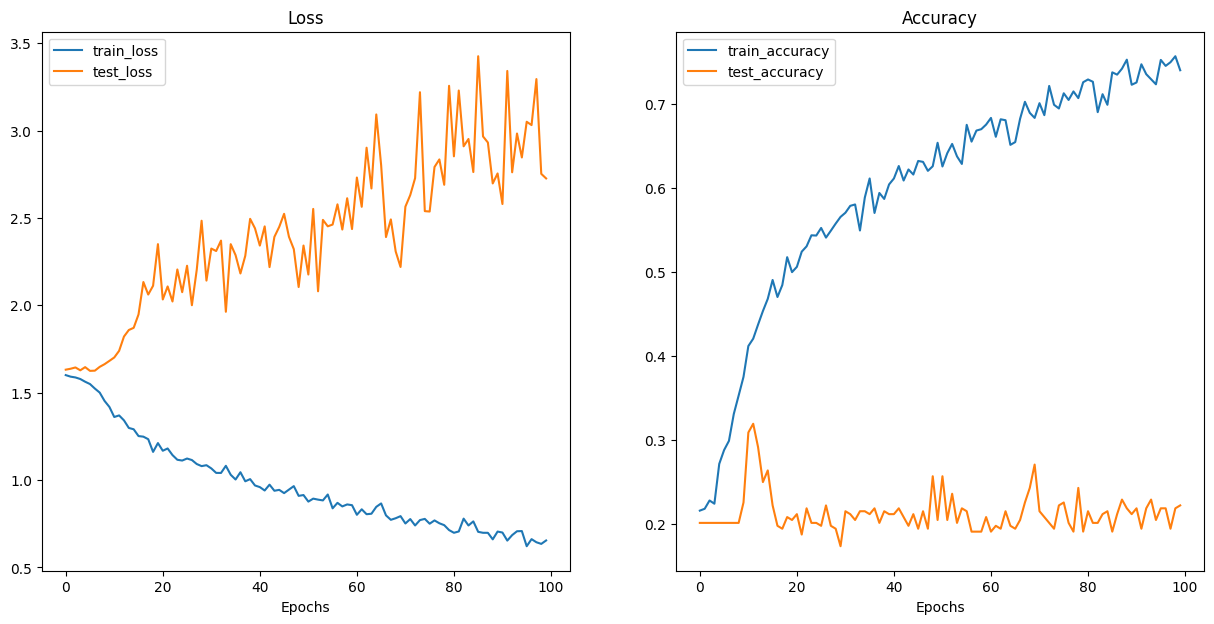

In [21]:
plot_loss_curves(model_results)

## Zapisanie modelu

In [22]:
model_save_path = "../models/cnn_lstm_model_ravdess.pth"

torch.save(obj=model.state_dict(),
             f=model_save_path)